# Name :- Shivansh

# Crisp Metrics(May'2021)

### Task-1 :- Airline Passenger Satisfaction 

***Data Science Internship

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle


import warnings                       ##to remove the warnings like sometimes we have warninigs while plotting our graphs
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
#df_train = train dataset
df= pd.read_csv('C:\\Users\\gollu\\Downloads\\Crisp Metrics\\Airline Passenger Satisfaction\\archive\\train.csv' , index_col =0)

### Exploratory Data analysis

In [3]:
df.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [5]:
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [6]:
df.shape

(103904, 24)

# Checking for Duplicates values

In [7]:
dupu = df.duplicated()
sum(dupu)   ## no duplicate values

0

In [8]:
df[df.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


# Missing value Handling

In [9]:
df.isnull().sum().sort_values(ascending = False)         ##Finding missing values

Arrival Delay in Minutes             310
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
id                                     0
dtype: int64

In [10]:
df['Arrival Delay in Minutes'].isnull().sum()

310

In [11]:
df['Arrival Delay in Minutes'].count()

103594

In [12]:
df['Arrival Delay in Minutes'].isnull().sum()/df['Arrival Delay in Minutes'].count()*100    ######Arrival Dealy in Minutes have 0.3% of missing data
                            

0.29924513002683556

# Checking for Outliers

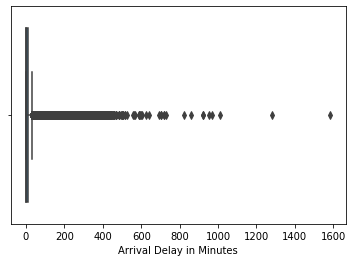

In [13]:
sns.boxplot(df['Arrival Delay in Minutes'])   

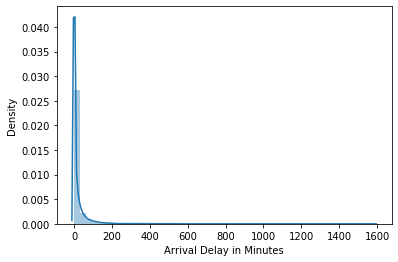

In [14]:
sns.distplot(df['Arrival Delay in Minutes'])

In [15]:
df['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
823.0        1
459.0        1
518.0        1
370.0        1
429.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

In [16]:
df['Arrival Delay in Minutes'].median()           

0.0

In [17]:
df['Arrival Delay in Minutes'].replace(np.NaN,df['Arrival Delay in Minutes'].median(),inplace  = True)


 #replacing the missing values with median as there are outliers

In [18]:
df['Arrival Delay in Minutes'].isnull().sum()

0

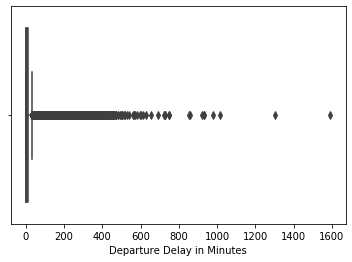

In [19]:
sns.boxplot(df['Departure Delay in Minutes'])   ## outliers are present in "Departure Delay in Minutes "

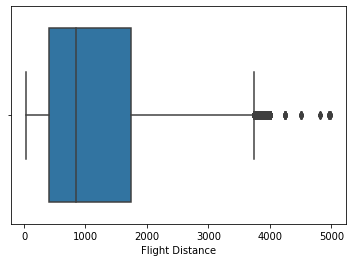

In [20]:
sns.boxplot(df['Flight Distance'])

# Data Visualization

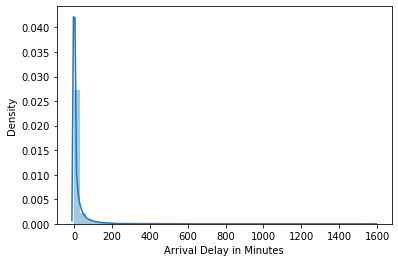

In [21]:
sns.distplot(df['Arrival Delay in Minutes'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

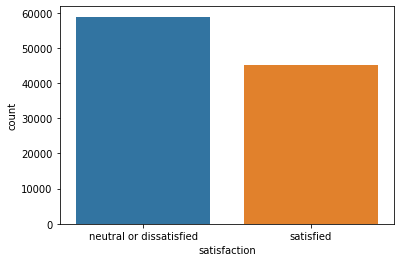

In [22]:
sns.countplot(df['satisfaction']) 
sns.set_palette('cubehelix')             ##distribution of Satisfied and and Dissatisfied customers
plt.xticks()

In [23]:
cols = df.columns
cols

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Text(0.5, 1.0, 'Satisfied vs Non-Satisfied')

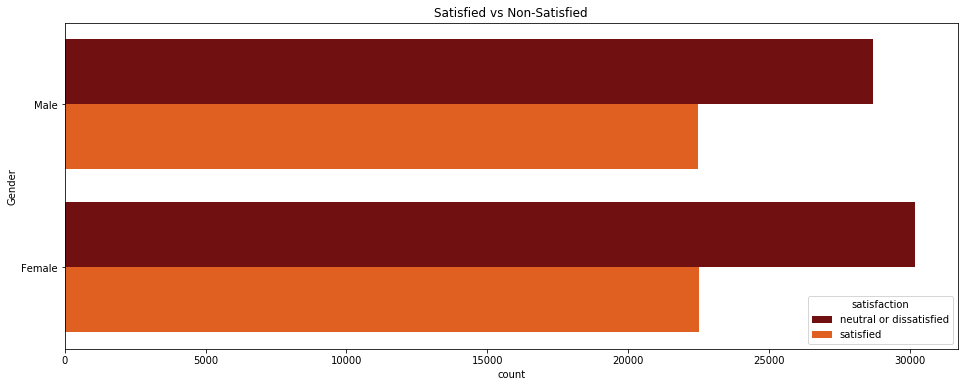

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(y= 'Gender', hue = 'satisfaction', data =df,palette = "gist_heat")  ##Gender-wise distribution in terms of  customer Satisfaction
plt.title('Satisfied vs Non-Satisfied')

Text(0.5, 1.0, 'Satisfied vs Non-Satisfied')

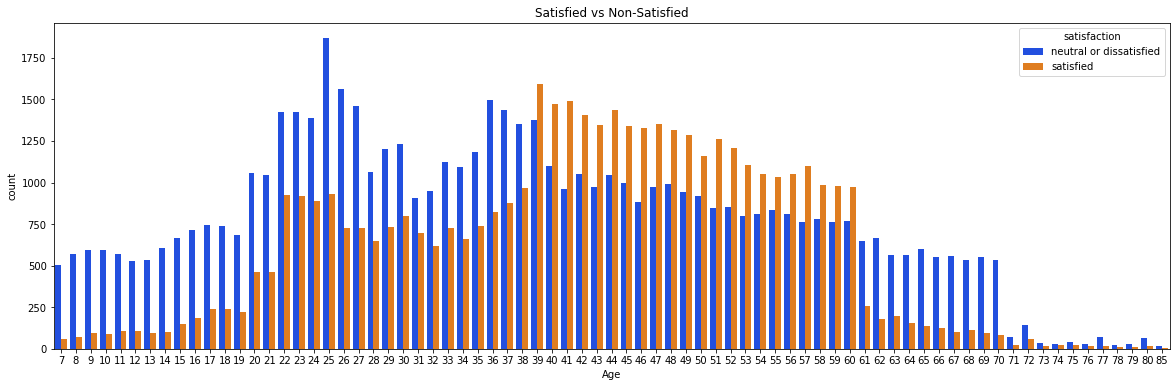

In [25]:
sns.set_palette('bright')     
plt.figure(figsize=(20,6))                               ##Distribution Based on Age Group with respect to customer type
sns.countplot(x = "Age",hue= 'satisfaction',data = df)
plt.title('Satisfied vs Non-Satisfied')

Text(0.5, 1.0, 'Satisfied vs Non-Satisfied')

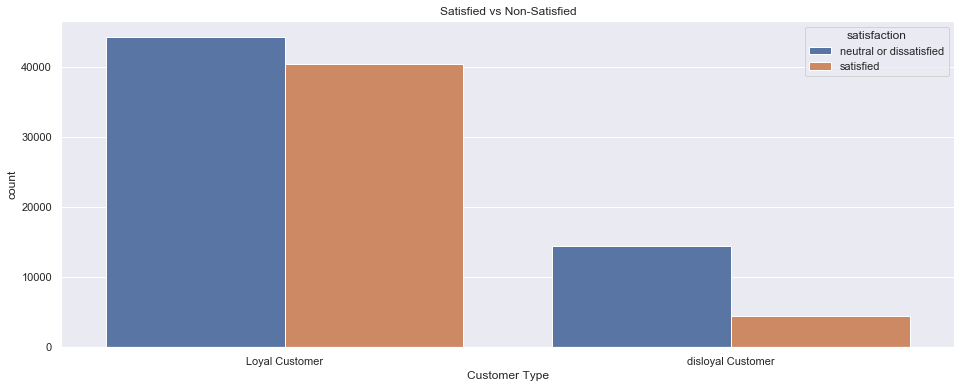

In [26]:
sns.set_palette('pastel')     
sns.set(rc={'figure.figsize':(16,6)})                                  ## Loyal customer are more in number
sns.countplot(x = "Customer Type",hue= 'satisfaction',data = df)
plt.title('Satisfied vs Non-Satisfied')


Text(0.5, 1.0, 'Satisfied vs Non-Satisfied')

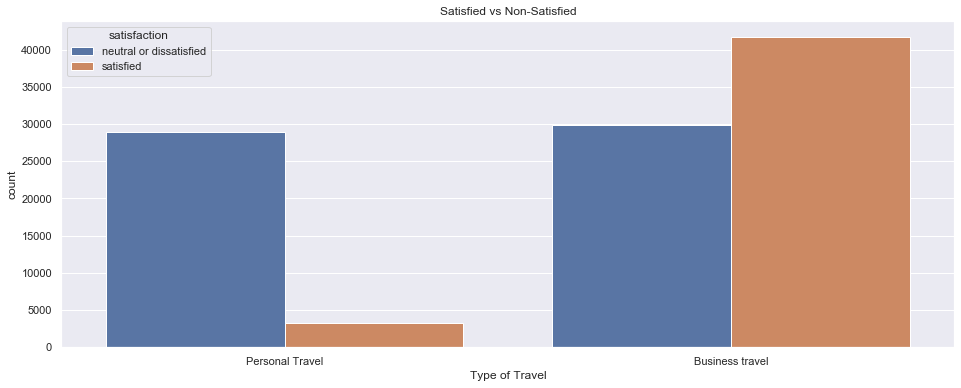

In [27]:
sns.countplot(x = "Type of Travel",hue= 'satisfaction',data = df)   ##Distribution based on Type of travel
plt.title('Satisfied vs Non-Satisfied')

Text(0.5, 1.0, 'Satisfied vs Non-Satisfied')

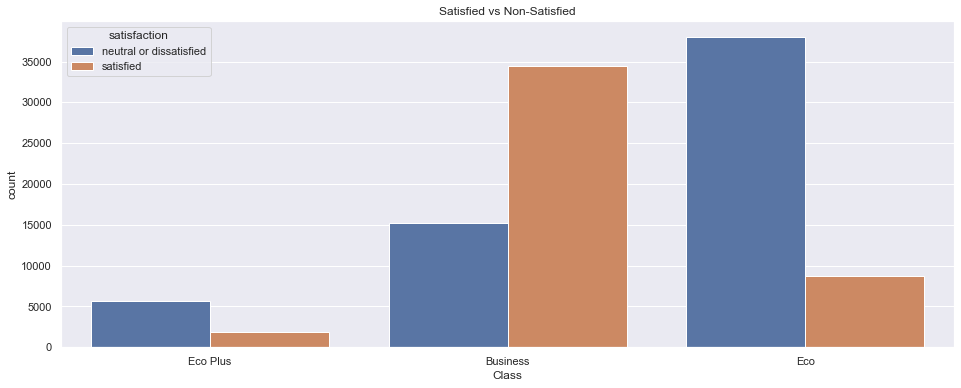

In [28]:
sns.countplot(x = "Class",hue= 'satisfaction',data = df)  ##Distribution based on Class
plt.title('Satisfied vs Non-Satisfied')

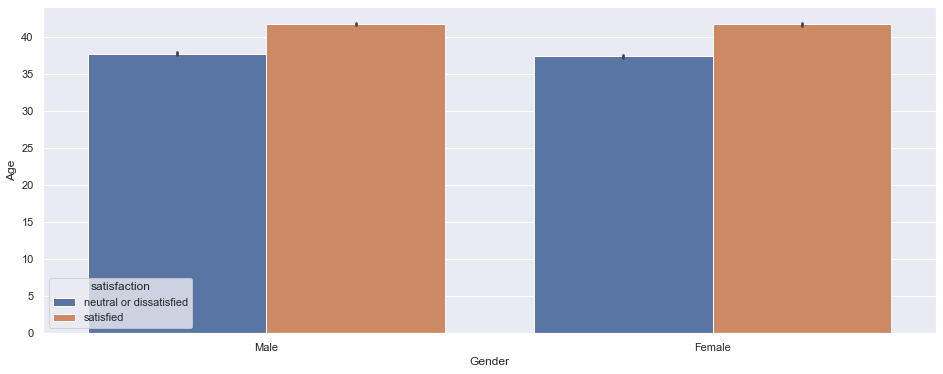

In [29]:
sns.barplot(x = 'Gender',y = 'Age', data = df, hue = 'satisfaction') ##Distribution between Gender and Age

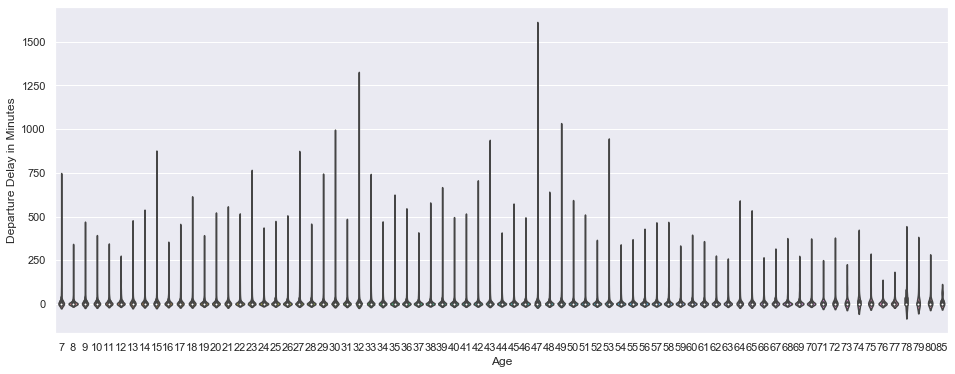

In [30]:
sns.violinplot(x ='Age',y ='Departure Delay in Minutes', data = df )  ##Distribution between Age and Departure delay 

Text(0.5, 0, 'Flight Distance x Departure Delay in Minutes')

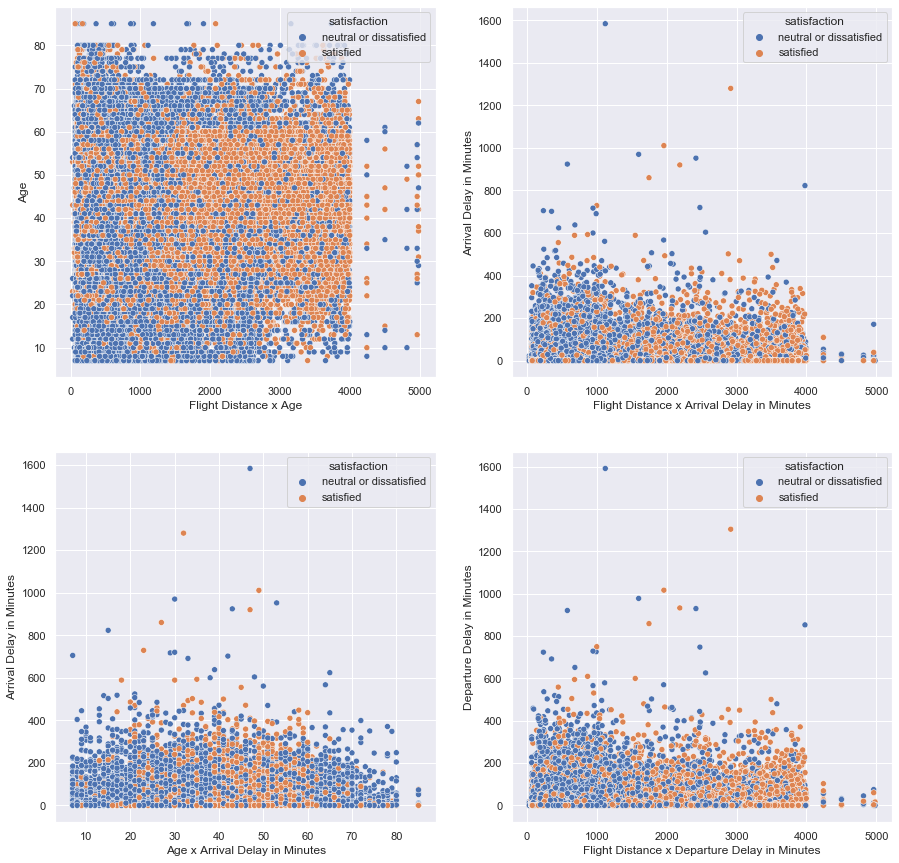

In [31]:
dffig, axes = plt.subplots(2, 2, figsize=(15,15))

sns.scatterplot(data = df, x = 'Flight Distance', y= 'Age', ax = axes[0][0], hue = 'satisfaction')
axes[0,0].set_xlabel('Flight Distance x Age')

sns.scatterplot(data = df, x = 'Flight Distance', y= 'Arrival Delay in Minutes', ax = axes[0][1], hue = 'satisfaction')
axes[0,1].set_xlabel('Flight Distance x Arrival Delay in Minutes')

sns.scatterplot(data = df, x = 'Age', y= 'Arrival Delay in Minutes', ax = axes[1][0], hue = 'satisfaction')
axes[1,0].set_xlabel('Age x Arrival Delay in Minutes')

sns.scatterplot(data = df, x = 'Flight Distance', y= 'Departure Delay in Minutes', ax = axes[1][1], hue = 'satisfaction')
axes[1,1].set_xlabel('Flight Distance x Departure Delay in Minutes')

<Figure size 504x504 with 0 Axes>

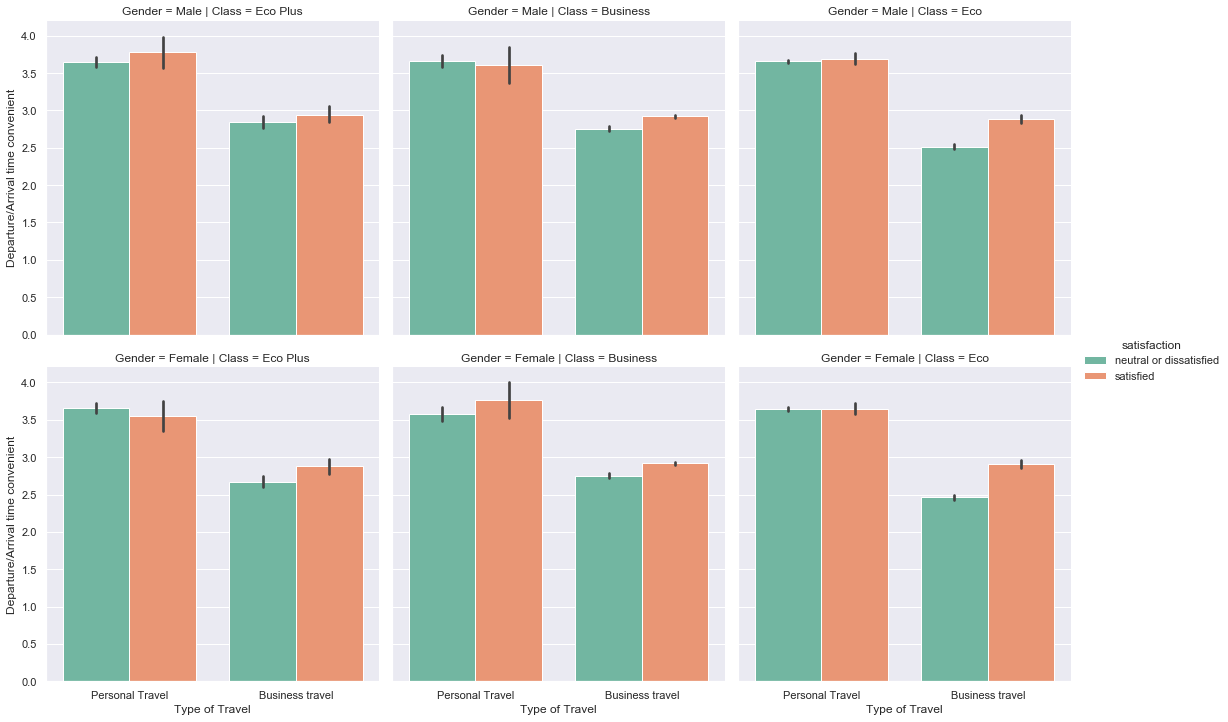

In [32]:
plt.figure(figsize = (7,7))
sns.set_palette('Set2')
sns.catplot(x = 'Type of Travel' , y = 'Departure/Arrival time convenient' , row = 'Gender', hue = 'satisfaction', col = 'Class', data = df , kind = 'bar')

<Figure size 504x504 with 0 Axes>

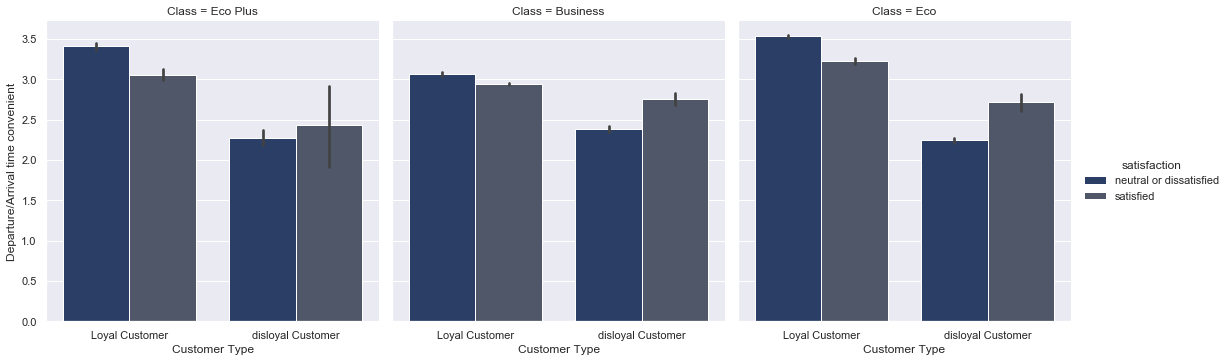

In [33]:
plt.figure(figsize = (7,7))            ##Distribution between Customer type and Departure delay based on customer satisfaction
sns.set_palette('cividis')
sns.catplot(x = 'Customer Type' , y = 'Departure/Arrival time convenient', hue = 'satisfaction', col = 'Class', data = df , kind = 'bar')

# Heatmap (Showing Correlation)

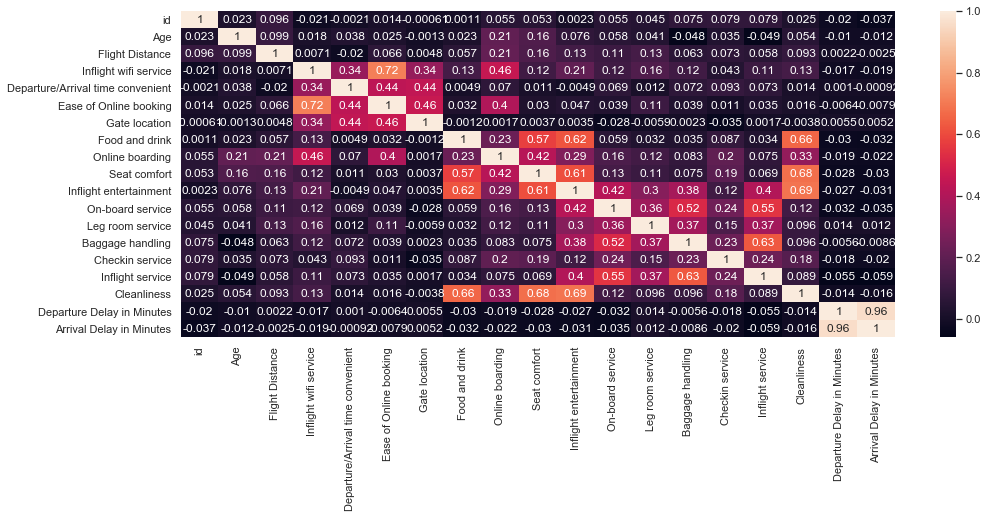

In [34]:
sns.heatmap(df.corr(), annot = True)

In [35]:
def correlation_check(df,val):
    corr_matrix = df.corr()
    features = set()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>0.9:
                features.add(corr_matrix.columns[i])
                
    return features            

In [36]:
columns = correlation_check(df,0.9)
columns

{'Arrival Delay in Minutes'}

In [37]:
#so we can remove the column 'Arrival Delay in Minutes' as this is highly correlated with the feature "Departure delay in minutes"

In [38]:
df.drop(columns,axis =1 ,inplace = True)    
df.drop(["id"],axis =1,inplace =True)


In [39]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [41]:
df_cate = df.select_dtypes(include= "object")
df_cate                                            ##categorical data

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


# Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
df_cate_new= df_cate.loc[:,['Gender','Customer Type', 'Type of Travel', 'Class', 'satisfaction']]
lencoders = {}

for col in df_cate.columns:
    lencoders[col]=LabelEncoder()
    df_cate[col]=lencoders[col].fit_transform(df_cate[col])

    

In [44]:
df_cate

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,1,0,1,2,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,0,1
...,...,...,...,...,...
103899,0,1,0,1,0
103900,1,0,0,0,1
103901,1,1,0,0,0
103902,0,1,0,1,0


In [45]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [46]:
df_numeric = df.loc[:,['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink',
                       'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]  ## removing column data which are to be scaled 
df_numeric

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [47]:
df_a= pd.concat([df_cate,df_numeric],axis = 1)        ##Concating both the dataframes

df_a

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,1,2,0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,1,1,0,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,0,0,0,0,1,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,0,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,1,0,0,0,1,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,1,0,0,0,1,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,0,0,0,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,0,1,0,1,0,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [48]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


# Scaling Data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
df_s = df.loc[:,['Age','Flight Distance', 'Departure Delay in Minutes']]


In [51]:
standard_scaler =StandardScaler()
standard_scaler.fit(df_s)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
df_last = pd.DataFrame(standard_scaler.transform(df_s),columns=df_s.columns)

In [53]:
df_last

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745279,-0.731539,0.266393
1,-0.951360,-0.957184,-0.361375
2,-0.885200,-0.047584,-0.387532
3,-0.951360,-0.629246,-0.099805
4,1.430397,-0.978244,-0.387532
...,...,...,...
103899,-1.083680,-1.000307,-0.309061
103900,0.636478,1.160869,-0.387532
103901,-0.620561,0.807860,-0.204433
103902,-1.149840,-0.189991,-0.387532


In [54]:
df_final= pd.concat([df_a,df_last],axis=1)
df_final

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Departure Delay in Minutes
0,1,0,1,2,0,3,4,3,1,5,...,5,4,3,4,4,5,5,-1.745279,-0.731539,0.266393
1,1,1,0,0,0,3,2,3,3,1,...,1,1,5,3,1,4,1,-0.951360,-0.957184,-0.361375
2,0,0,0,0,1,2,2,2,2,5,...,5,4,3,4,4,4,5,-0.885200,-0.047584,-0.387532
3,0,0,0,0,0,2,5,5,5,2,...,2,2,5,3,1,4,2,-0.951360,-0.629246,-0.099805
4,1,0,0,0,1,3,3,3,3,4,...,3,3,4,4,3,3,3,1.430397,-0.978244,-0.387532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,2,1,2,3,2,...,2,3,1,4,2,3,2,-1.083680,-1.000307,-0.309061
103900,1,0,0,0,1,4,4,4,4,2,...,5,5,5,5,5,5,4,0.636478,1.160869,-0.387532
103901,1,1,0,0,0,1,1,1,3,4,...,4,3,2,4,5,5,4,-0.620561,0.807860,-0.204433
103902,0,1,0,1,0,1,1,1,5,1,...,1,4,5,1,5,4,1,-1.149840,-0.189991,-0.387532


# Train-Test Split

In [55]:
X = df_final.drop('satisfaction',axis=1)
y= df_final['satisfaction']

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
f_model=ExtraTreesClassifier()
f_model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [58]:
print(f_model.feature_importances_)

[0.00694293 0.05677129 0.13134901 0.08420795 0.13377651 0.01886874
 0.03875762 0.01792275 0.01370055 0.13538049 0.04439873 0.05793377
 0.03626257 0.035967   0.03244543 0.03088063 0.02795461 0.03192191
 0.02363029 0.02848952 0.01243772]


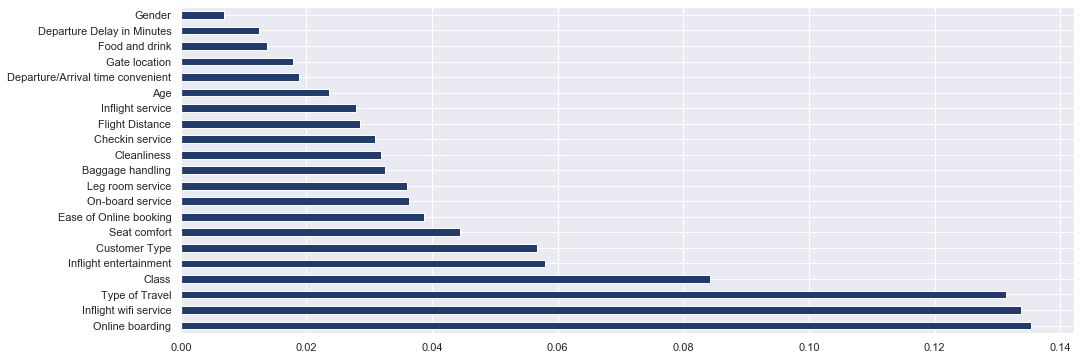

In [59]:
#plotting graph for better visualization
feat_impo=pd.Series(f_model.feature_importances_ , index=X.columns)
feat_impo.nlargest(25).plot(kind='barh')

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
X_train

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Departure Delay in Minutes
38476,1,0,0,1,2,1,1,1,2,2,...,2,4,3,2,3,4,2,-0.025121,-0.900020,-0.387532
11025,1,0,1,1,2,5,4,2,4,4,...,4,4,4,2,2,2,4,-1.414480,-0.647298,1.129573
87002,0,0,1,2,4,2,4,4,1,4,...,1,1,5,4,1,4,1,-1.017520,-0.996295,0.815689
79095,0,0,1,1,1,4,1,3,2,3,...,4,4,1,4,3,4,4,1.364237,0.251270,-0.387532
38319,0,0,0,0,1,4,4,4,1,3,...,1,1,1,1,1,1,4,-0.025121,0.751700,-0.387532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0,0,1,5,1,1,1,3,1,...,5,5,5,5,3,5,1,0.437998,-0.957184,-0.021334
45891,1,0,0,0,3,5,3,3,1,5,...,5,5,5,5,2,5,2,0.702638,0.239235,-0.387532
42613,1,0,1,1,5,5,5,1,3,5,...,3,4,5,4,3,4,3,-1.348320,-0.698444,-0.387532
43567,0,0,1,1,2,5,2,3,2,5,...,5,5,2,5,4,5,5,1.959676,-0.265206,-0.387532


In [63]:
X_test

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Departure Delay in Minutes
70655,1,0,0,0,3,3,4,3,5,4,...,4,4,4,4,4,4,3,-0.025121,2.415454,-0.387532
56114,0,0,1,1,2,4,2,3,5,4,...,2,2,2,2,5,2,5,1.827356,0.885081,-0.387532
95351,1,0,1,1,2,3,2,3,1,2,...,1,2,2,4,2,4,1,-1.083680,-0.328387,0.397178
32181,0,0,0,0,1,5,5,5,1,3,...,1,1,1,1,1,1,1,1.364237,-0.782685,-0.230590
5214,1,0,0,2,5,5,5,5,5,5,...,5,1,4,5,3,2,5,-0.686721,-0.970221,-0.387532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68545,1,0,0,0,2,2,2,2,2,3,...,5,5,5,5,5,5,5,0.702638,-0.103745,-0.387532
55529,0,0,0,0,1,1,1,1,5,4,...,4,4,4,4,4,4,5,0.702638,1.192961,-0.387532
92755,1,0,0,0,1,1,5,1,5,5,...,5,5,5,5,5,5,5,0.636478,-0.819791,-0.073648
56732,1,0,1,1,1,5,1,1,5,1,...,5,2,2,3,5,2,5,-2.142239,-0.457756,-0.387532


# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf = RandomForestClassifier(max_depth = 35, min_samples_leaf = 1 ,min_samples_split =2 , n_estimators = 1400 , random_state = 42).fit(X_train,y_train )

In [66]:
 y_pred = clf.predict(X_test)

In [67]:
from sklearn.metrics import f1_score , confusion_matrix , accuracy_score
print("Accuracy SCore is :",accuracy_score(y_pred,y_test))

Accuracy SCore is : 0.964053702901689


In [68]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[11531,   239],
       [  508,  8503]], dtype=int64)

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lr_pred= lr.predict(X_test)

In [73]:
lr_pred

array([1, 0, 0, ..., 1, 0, 0])

In [74]:
print("Accuracy SCore is :",accuracy_score(lr_pred,y_test))

Accuracy SCore is : 0.8758000096241759


In [75]:
cm1= confusion_matrix(y_test,lr_pred)
cm1

array([[10598,  1172],
       [ 1409,  7602]], dtype=int64)

# Naive Bayes Model

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
cl_pred = classifier.predict(X_test)
cl_pred

array([1, 0, 0, ..., 1, 0, 0])

In [79]:
print("Accuracy SCore is :",accuracy_score(cl_pred,y_test))

Accuracy SCore is : 0.8673788556854819


# K-Nearest Neighbor(KNN) 

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors =5 )   #2 0.91 , #3 0.92 , #4 0.924
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 0, 0, ..., 1, 0, 1])

In [83]:
print("Accuracy SCore is :",accuracy_score(knn_pred,y_test))

Accuracy SCore is : 0.9298397574707665


## Hence we can say that Randomforest classifier is predicting better

In [84]:
filename='model.pkl'

In [ ]:
pickle.dump(clf,open(filename,'wb'))

In [87]:
model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])